# MASK

In [22]:
#import libraries
from osgeo import gdal
import os
import rasterio
from rasterio.plot import show

##### configure directories

In [23]:
#directory input and local output
dir = os.getcwd()
inputdirectory = dir + '/imagenes/'
outdirectory = dir + '/Output/'

##### create loop for search

In [26]:
#search criteria
Listb = [ras for ras in os.listdir(inputdirectory) if ras[-4:]=='.tif']
#verificate
print(Listb)

['B3.tif', 'B4.tif', 'B8.tif']


##### mask

In [30]:
#shapefile for mask
shp_mask = dir + '/entrenamiento/ambito.shp'
shp_mask

'/home/jovyan/work/GitHub/BinderTester/entrenamiento/ambito.shp'

##### execute the program 

In [31]:
#We configure the necessary options following the options of the warp function in the OSGEO api
for ras in Listb:
    options = gdal.WarpOptions(cutlineDSName=shp_mask,cropToCutline=True)
    outBand = gdal.Warp(srcDSOrSrcDSTab=os.path.join(inputdirectory + ras),
                        destNameOrDestDS=outdirectory + ras[:-4]+'_cut'+ras[-4:],
                        options=options)

#close in memory    
outfile= None

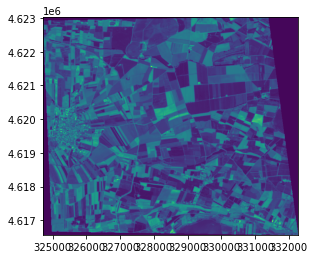

<AxesSubplot:>

In [32]:
raster = outdirectory + '/B4_cut.tif'
mask = rasterio.open(raster)
show(mask)